<a href="https://colab.research.google.com/github/ChristoRay/ChrisPortofolioForDS/blob/main/Fifa%2019%20Project/EDA_on_Outfield_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
df = pd.read_csv('/content/df_outfield.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


In [64]:
#drop unecessary columns
df.drop(columns=['Unnamed: 0'],inplace = True)

In [65]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,16122.000000,16122.000000,16122.000000,1.612200e+04,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,1.612200e+04
mean,25.005272,66.461233,71.515631,2.522221e+06,10130.194765,1.115494,3.004590,2.532502,19.424203,180.388683,74.449192,59.836000,59.836000,59.836000,61.058181,60.739921,60.739921,60.739921,61.058181,61.003660,61.003660,61.003660,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,4.379962e+06
std,4.547106,6.794631,6.074413,5.711658e+06,22582.379873,0.396542,0.636915,0.617823,15.595258,6.430065,6.716756,9.142763,9.142763,9.142763,9.891451,9.853478,9.853478,9.853478,9.891451,9.782895,9.782895,9.782895,9.264765,8.817549,8.817549,8.817549,9.264765,8.982024,10.093232,10.093232,10.093232,8.982024,9.538665,11.719739,11.719739,11.719739,9.538665,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,1.091852e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.00000

In [66]:
'''looking at these summaries, columns potential and value looks a bit weird, since
there are players that doesn't have value or wage. we'll look into these
'''
#players with value = 0
df[df['Wage']==0]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
399,L. Paredes,24,Argentina,80,85,No Club,0.0,0.0,Right,2.0,4.0,4.0,CM,5.0,180.34,74.84,73,73,73,77,77,77,77,77,79,79,79,78,81,81,81,78,77,79,79,79,77,76,74,74,74,76,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,0.0,Medium,Medium
476,A. Granqvist,33,Sweden,80,80,No Club,0.0,0.0,Right,2.0,4.0,2.0,LCB,4.0,193.04,83.91,64,64,64,58,60,60,60,58,60,60,60,59,66,66,66,59,70,76,76,76,70,72,81,81,81,72,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,0.0,High,Medium
601,I. Smolnikov,29,Russia,79,79,No Club,0.0,0.0,Right,2.0,3.0,3.0,RB,2.0,177.80,69.85,72,72,72,75,74,74,74,75,75,75,75,77,76,76,76,77,80,77,77,77,80,80,75,75,75,80,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,0.0,High,High
775,A. Dzyuba,29,Russia,78,78,No Club,0.0,0.0,Right,2.0,3.0,3.0,ST,22.0,195.58,91.17,79,79,79,73,76,76,76,73,73,73,73,73,68,68,68,73,54,54,54,54,54,50,50,50,50,50,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,0.0,High,Medium
849,Luís Neto,30,Portugal,77,77,No Club,0.0,0.0,Right,1.0,3.0,2.0,CB,4.0,187.96,71.21,54,54,54,53,53,53,53,53,56,56,56,56,63,63,63,56,69,74,74,74,69,71,77,77,77,71,42.0,33.0,80.0,72.0,40.0,49.0,52.0,43.0,77.0,48.0,57.0,59.0,69.0,78.0,61.0,42.0,79.0,72.0,72.0,37.0,76.0,78.0,44.0,46.0,47.0,72.0,80.0,77.0,78.0,0.0,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,M. Smith,18,Wales,56,75,No Club,0.0,0.0,Right,1.0,2.0,2.0,CDM,23.0,177.80,68.04,49,49,49,52,51,51,51,52,53,53,53,54,55,55,55,54,55,57,57,57,55,55,55,55,55,55,46.0,39.0,38.0,58.0,38.0,50.0,51.0,42.0,54.0,54.0,58.0,60.0,62.0,53.0,68.0,46.0,66.0,58.0,57.0,40.0,62.0,55.0,45.0,52.0,45.0,55.0,51.0,55.0,52.0,0.0,Medium,Medium
15101,J. Lalrinzuala,19,India,56,64,No Club,0.0,0.0,Left,1.0,2.0,2.0,LB,6.0,175.26,68.04,50,50,50,50,48,48,48,50,46,46,46,51,45,45,45,51,56,51,51,51,56,57,54,54,54,57,54.0,36.0,44.0,43.0,34.0,46.0,24.0,40.0,35.0,41.0,76.0,73.0,67.0,54.0,71.0,63.0,63.0,65.0,56.0,32.0,52.0,49.0,47.0,35.0,36.0,44.0,57.0,58.0,53.0,0.0,Medium,Medium
15157,A. Kuruniyan,21,India,56,70,No Club,0.0,0.0,Left,1.0,3.0,2.0,LW,13.0,175.26,69.85,57,57,57,58,57,57,57,58,55,55,55,57,49,49,49,57,44,38,38,38,44,42,34,34,34,42,53.0,47.0,58.0,56.0,39.0,49.0,37.0,48.0,31.0,54.0,76.0,78.0,81.0,54.0,76.0,57.0,52.0,65.0,49.0,49.0,33.0,20.0,58.0,48.0,37.0,41.0,17.0,15.0,12.0,0.0,High,Medium
15185,G. Kostadinov,27,Bulgaria,56,57,No Club,0.0,0.0,Right,1.0,3.0,2.0,LDM,7.0,182.88,73.94,49,49,49,49,49,49,49,49,51,51,51,51,53,53,53,51,55,57,57,57,55,56,57,57,57,56,43.0,36.0,48.0,67.0,28.0,48.0,36.0,35.0,65.0,45.0,57.0,64.0,52.0,52.0,60.0,63.0,55.0,46.0,55.0,32.0,52.0,45.0,34.0,45.0,42.0,45.0,58.0,58.0,67.0,0.0,Medium,High


In [67]:
#looks like, players that doesn't have a club, are not paid, let's see if this is the case here
df[df['Club']=='No Club'][['Value','Wage']].describe()

,Value,Wage
count,196.0,196.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [68]:
#since players with no club doesn't have value and wage, we'll drop these rows
df.drop(df.loc[df['Club']=='No Club'].index,inplace = True)
df.drop(df.loc[df['Value']==0].index,inplace = True)
df.reset_index(drop=True, inplace=True)
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,15918.000000,15918.000000,15918.000000,1.591800e+04,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,1.591800e+04
mean,24.983603,66.446539,71.523935,2.554545e+06,10257.884156,1.115781,3.004083,2.533358,19.522553,180.387392,74.444555,59.845521,59.845521,59.845521,61.070549,60.753612,60.753612,60.753612,61.070549,61.017465,61.017465,61.017465,61.764229,60.245068,60.245068,60.245068,61.764229,59.518532,58.830318,58.830318,58.830318,59.518532,58.807576,57.611823,57.611823,57.611823,58.807576,54.188466,49.783578,57.039138,62.644742,46.754492,60.617477,51.282133,46.436299,56.088642,63.222892,67.913431,67.996231,66.446413,62.189157,66.584056,59.612514,66.049190,67.318696,65.911547,51.446790,59.572497,50.397223,54.849227,55.492650,52.115907,60.342882,51.268061,51.879005,49.590652,4.436094e+06
std,4.541327,6.809011,6.081923,5.740956e+06,22697.749026,0.397392,0.637005,0.618239,15.653781,6.429679,6.722722,9.140005,9.140005,9.140005,9.886520,9.846850,9.846850,9.846850,9.886520,9.776503,9.776503,9.776503,9.262013,8.820183,8.820183,8.820183,9.262013,8.991350,10.101945,10.101945,10.101945,8.991350,9.545800,11.722398,11.722398,11.722398,9.545800,14.129959,16.360958,11.611999,9.778864,14.772758,12.502268,15.134658,15.071968,12.382087,9.994216,11.745636,11.465044,12.346095,8.776326,12.182357,13.213163,11.541628,11.183321,12.600625,15.715381,14.430470,18.799664,14.662011,12.894609,12.498331,10.141434,17.199529,19.164464,19.165211,1.097693e+07
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,26.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.000

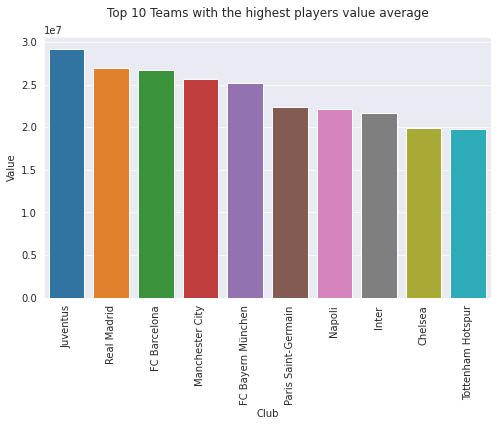

In [69]:
#Which team has the highest average player value ?

average_value_sort = df.groupby('Club').mean()['Value'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[:10])
plt.title('Top 10 Teams with the highest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

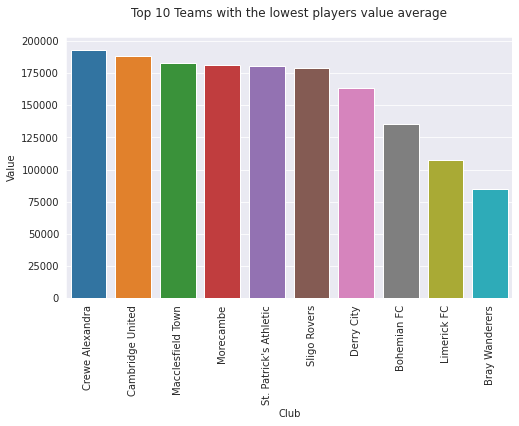

In [70]:
#How about the lowest 10 teams by average player values? 
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[-10:])
plt.title('Top 10 Teams with the lowest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [71]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


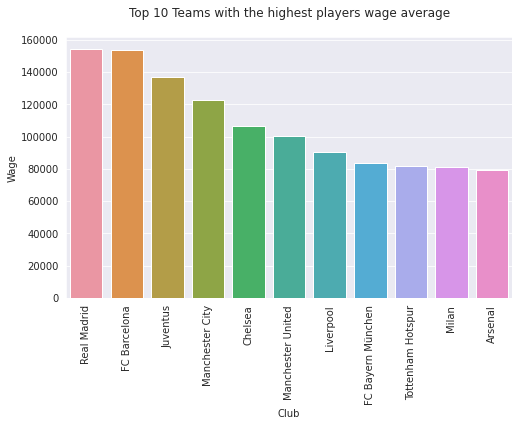

In [72]:
#Which team has the highest average player wage ?

average_wage_sort = df.groupby('Club').mean()['Wage'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[:11])
plt.title('Top 10 Teams with the highest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

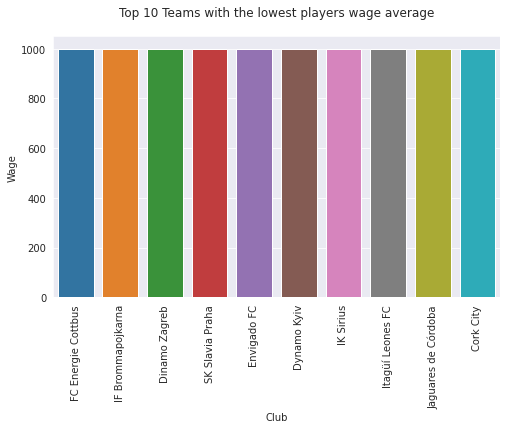

In [73]:
#How about clubs with lowest average player wage ?
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[-10:])
plt.title('Top 10 Teams with the lowest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [74]:
'''
looking at the graph above, we'll look into why all of them have the same average
wage for players
'''

clubs = average_wage_sort['Club'][-10:].values
clubs_lowest_average = df[df['Club'].isin(clubs)].reset_index().copy()
clubs_lowest_average.groupby('Club').agg({'index':'count','Wage':['sum','count','mean']})

#from this output, we can see that these clubs pays all of their players the same amount

index     Wage              
                    count      sum count    mean
Club                                            
Cork City              23  23000.0    23  1000.0
Dinamo Zagreb          25  25000.0    25  1000.0
Dynamo Kyiv            25  25000.0    25  1000.0
Envigado FC            26  26000.0    26  1000.0
FC Energie Cottbus     26  26000.0    26  1000.0
IF Brommapojkarna      24  24000.0    24  1000.0
IK Sirius              24  24000.0    24  1000.0
Itagüí Leones FC       22  22000.0    22  1000.0
Jaguares de Córdoba    23  23000.0    23  1000.0
SK Slavia Praha        25  25000.0    25  1000.0